# Setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
from google.colab import userdata

os.environ["HF_TOKEN"] = userdata.get("HF_TOKEN")
os.environ["ROBOFLOW_API_KEY"] = userdata.get("ROBOFLOW_API_KEY")

In [3]:
!nvidia-smi

Sun Jun 22 06:45:09 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   52C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [4]:
!pip install -q gdown inference-gpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.7/105.7 kB 5.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.4/99.4 kB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 62.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.1/190.1 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 72.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 94.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.4/243.4 kB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 6.7 MB/s eta 

In [5]:
!pip install -q git+https://github.com/roboflow/sports.git

  Preparing metadata (setup.py) ... done


In [4]:
!pip list | grep supervision

supervision                           0.25.1


In [7]:
!gdown -O "2e57b9_0.mp4" "https://drive.google.com/uc?id=19PGw55V8aA6GZu5-Aac5_9mCy3fNxmEf"

Downloading...
From: https://drive.google.com/uc?id=19PGw55V8aA6GZu5-Aac5_9mCy3fNxmEf
To: /content/2e57b9_0.mp4
100% 21.1M/21.1M [00:00<00:00, 31.1MB/s]


In [8]:
import os
os.environ["ONNXRUNTIME_EXECUTION_PROVIDERS"] = "[CUDAExecutionProvider]"

# Player, Goalkeeper, Referee, and Ball Detection

In [9]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 39.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

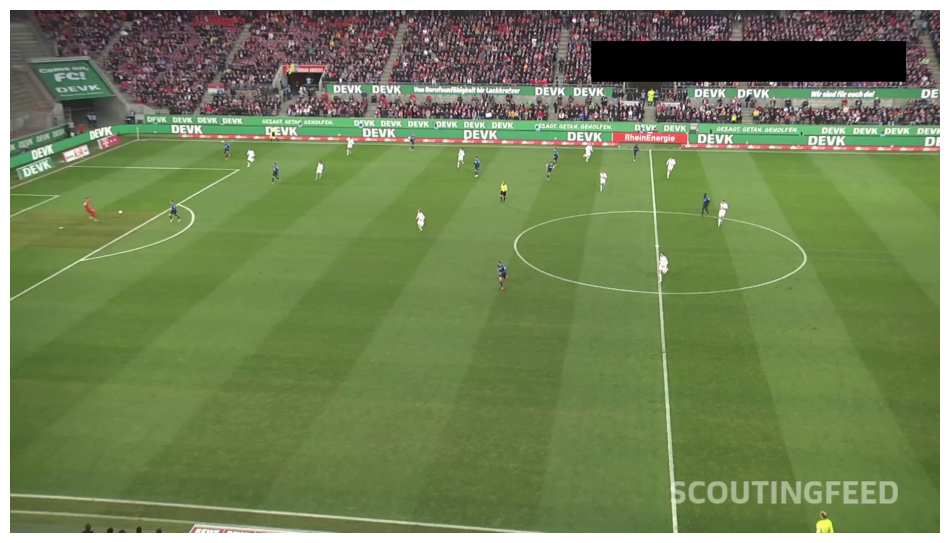

In [5]:
import supervision as sv

SOURCE_VIDEO_PATH = "/content/2e57b9_0.mp4"

frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
frame = next(frame_generator)

sv.plot_image(frame)

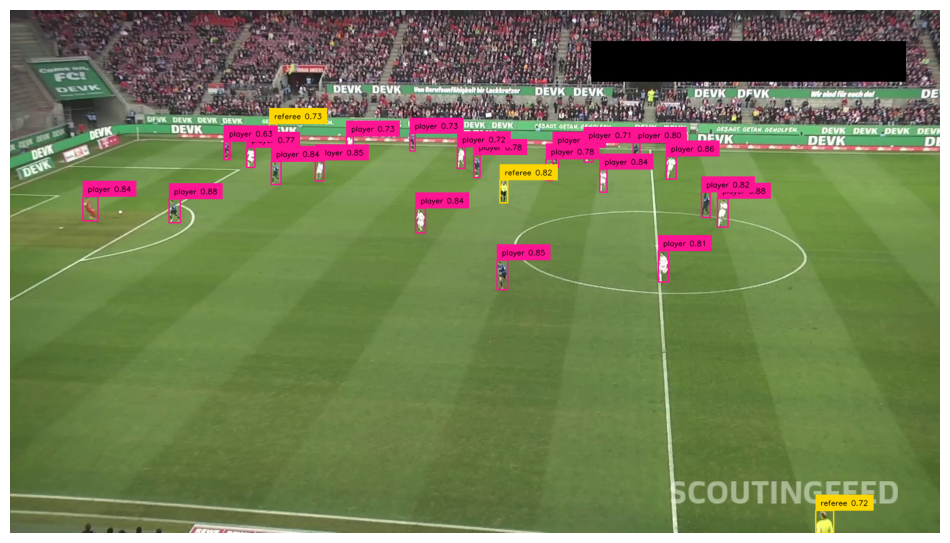

In [6]:
import supervision as sv
from ultralytics import YOLO

PLAYER_DETECTION_MODEL = YOLO("/content/drive/MyDrive/player.pt")

SOURCE_VIDEO_PATH = "/content/2e57b9_0.mp4"

box_annotator = sv.BoxAnnotator(
    color=sv.ColorPalette.from_hex(['#FF8C00', '#00BFFF', '#FF1493', '#FFD700']),
    thickness=2
)
label_annotator = sv.LabelAnnotator(
    color=sv.ColorPalette.from_hex(['#FF8C00', '#00BFFF', '#FF1493', '#FFD700']),
    text_color=sv.Color.from_hex('#000000')
)

frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
frame = next(frame_generator)

results = PLAYER_DETECTION_MODEL.predict(frame, conf=0.3, verbose=False)
result = results[0]

detections = sv.Detections.from_ultralytics(result)

labels = [
    f"{PLAYER_DETECTION_MODEL.names[class_id]} {confidence:.2f}"
    for class_id, confidence
    in zip(detections.class_id, detections.confidence)
]

annotated_frame = frame.copy()
annotated_frame = box_annotator.annotate(
    scene=annotated_frame,
    detections=detections)
annotated_frame = label_annotator.annotate(
    scene=annotated_frame,
    detections=detections,
    labels=labels)

sv.plot_image(annotated_frame)

# Video Game Style Visualization

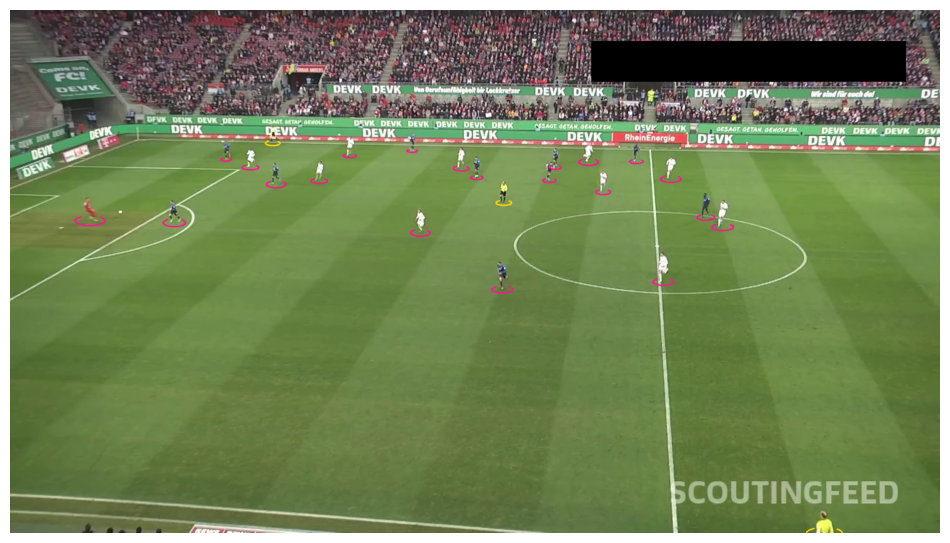

In [7]:
import supervision as sv

SOURCE_VIDEO_PATH = "/content/2e57b9_0.mp4"
BALL_ID = 0

ellipse_annotator = sv.EllipseAnnotator(
    color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    thickness=2
)
triangle_annotator = sv.TriangleAnnotator(
    color=sv.Color.from_hex('#FFD700'),
    base=25,
    height=21,
    outline_thickness=1
)

frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
frame = next(frame_generator)

results = PLAYER_DETECTION_MODEL.predict(frame, conf=0.3, verbose=False)
result = results[0]

detections = sv.Detections.from_ultralytics(result)

ball_detections = detections[detections.class_id == BALL_ID]
ball_detections.xyxy = sv.pad_boxes(xyxy=ball_detections.xyxy, px=10)

all_detections = detections[detections.class_id != BALL_ID]
all_detections = all_detections.with_nms(threshold=0.5, class_agnostic=True)
all_detections.class_id -= 1

annotated_frame = frame.copy()
annotated_frame = ellipse_annotator.annotate(
    scene=annotated_frame,
    detections=all_detections)
annotated_frame = triangle_annotator.annotate(
    scene=annotated_frame,
    detections=ball_detections)

sv.plot_image(annotated_frame)

# Player Tracking

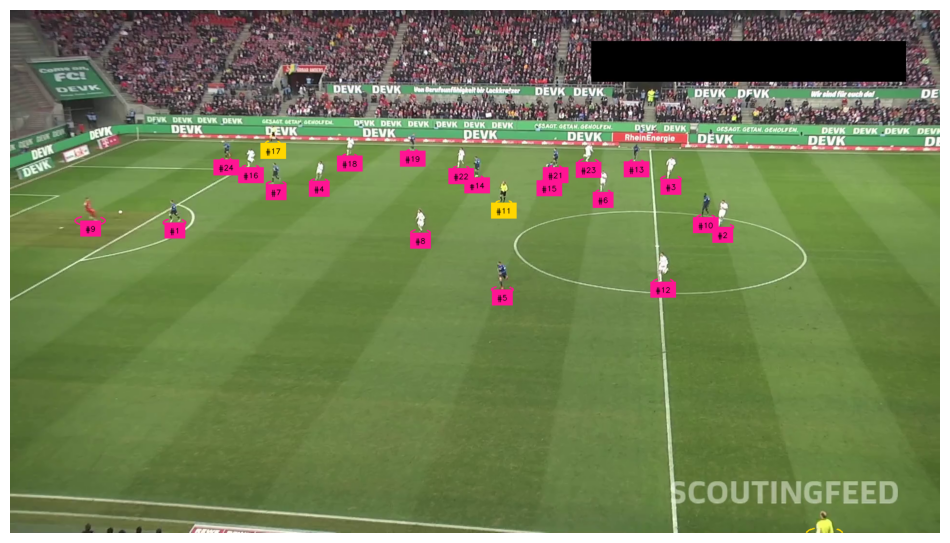

In [8]:
SOURCE_VIDEO_PATH = "/content/2e57b9_0.mp4"
BALL_ID = 0

ellipse_annotator = sv.EllipseAnnotator(
    color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    thickness=2
)
label_annotator = sv.LabelAnnotator(
    color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    text_color=sv.Color.from_hex('#000000'),
    text_position=sv.Position.BOTTOM_CENTER
)
triangle_annotator = sv.TriangleAnnotator(
    color=sv.Color.from_hex('#FFD700'),
    base=25,
    height=21,
    outline_thickness=1
)

tracker = sv.ByteTrack()
tracker.reset()

frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
frame = next(frame_generator)

results = PLAYER_DETECTION_MODEL.predict(frame, conf=0.3, verbose=False)
result = results[0]

detections = sv.Detections.from_ultralytics(result)

ball_detections = detections[detections.class_id == BALL_ID]
ball_detections.xyxy = sv.pad_boxes(xyxy=ball_detections.xyxy, px=10)

all_detections = detections[detections.class_id != BALL_ID]
all_detections = all_detections.with_nms(threshold=0.5, class_agnostic=True)
all_detections.class_id -= 1
all_detections = tracker.update_with_detections(detections=all_detections)

labels = [
    f"#{tracker_id}"
    for tracker_id
    in all_detections.tracker_id
]

annotated_frame = frame.copy()
annotated_frame = ellipse_annotator.annotate(
    scene=annotated_frame,
    detections=all_detections)
annotated_frame = label_annotator.annotate(
    scene=annotated_frame,
    detections=all_detections,
    labels=labels)
annotated_frame = triangle_annotator.annotate(
    scene=annotated_frame,
    detections=ball_detections)

sv.plot_image(annotated_frame)

# Team Classification Home & Away

In [9]:
from tqdm import tqdm

SOURCE_VIDEO_PATH = "/content/2e57b9_0.mp4"
PLAYER_ID = 2
STRIDE = 30

frame_generator = sv.get_video_frames_generator(
    source_path=SOURCE_VIDEO_PATH, stride=STRIDE)

crops = []
for frame in tqdm(frame_generator, desc='collecting crops'):
    results = PLAYER_DETECTION_MODEL.predict(frame, conf=0.3, verbose=False)
    result = results[0]

    detections = sv.Detections.from_ultralytics(result)
    detections = detections.with_nms(threshold=0.5, class_agnostic=True)
    detections = detections[detections.class_id == PLAYER_ID]
    players_crops = [sv.crop_image(frame, xyxy) for xyxy in detections.xyxy]
    crops += players_crops

collecting crops: 25it [00:18,  1.32it/s]


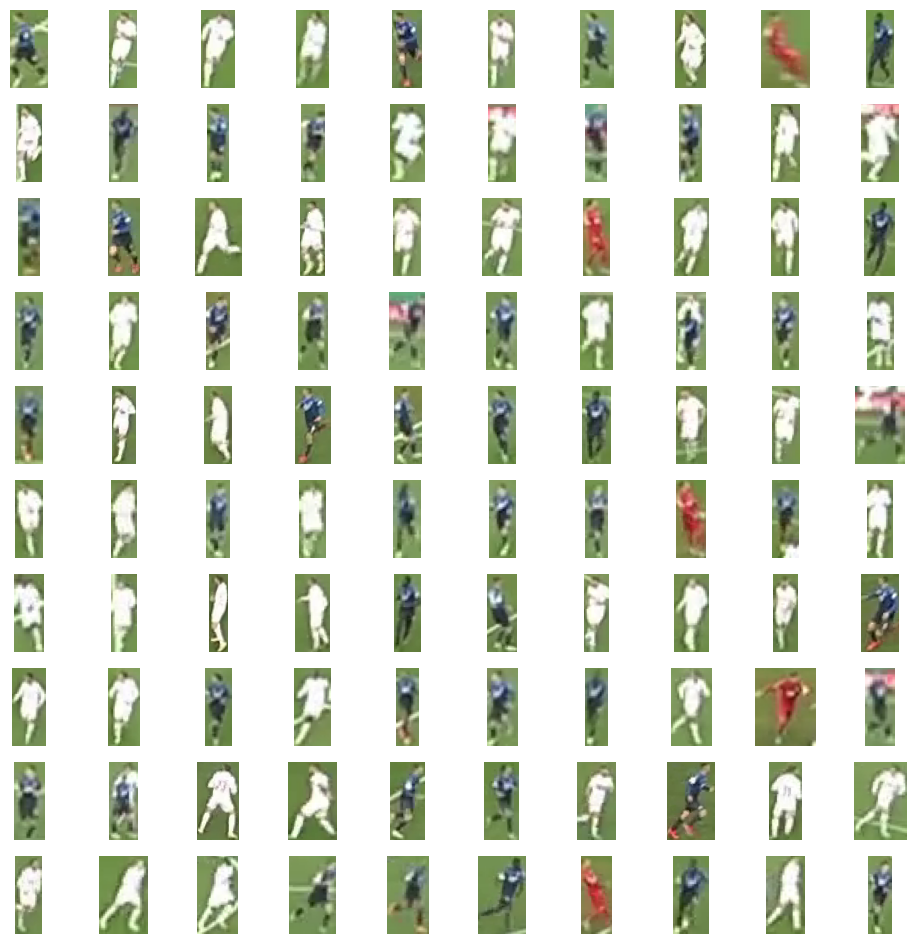

In [10]:
sv.plot_images_grid(crops[:100], grid_size=(10, 10))

In [11]:
import torch
from transformers import AutoProcessor, SiglipVisionModel

SIGLIP_MODEL_PATH = 'google/siglip-base-patch16-224'

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
EMBEDDINGS_MODEL = SiglipVisionModel.from_pretrained(SIGLIP_MODEL_PATH).to(DEVICE)
EMBEDDINGS_PROCESSOR = AutoProcessor.from_pretrained(SIGLIP_MODEL_PATH)

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


In [12]:
import numpy as np
from more_itertools import chunked

BATCH_SIZE = 32

crops = [sv.cv2_to_pillow(crop) for crop in crops]
batches = chunked(crops, BATCH_SIZE)
data = []
with torch.no_grad():
    for batch in tqdm(batches, desc='embedding extraction'):
        inputs = EMBEDDINGS_PROCESSOR(images=batch, return_tensors="pt").to(DEVICE)
        outputs = EMBEDDINGS_MODEL(**inputs)
        embeddings = torch.mean(outputs.last_hidden_state, dim=1).cpu().numpy()
        data.append(embeddings)

data = np.concatenate(data)

embedding extraction: 17it [00:10,  1.56it/s]


In [13]:
import umap
from sklearn.cluster import KMeans

REDUCER = umap.UMAP(n_components=3)
CLUSTERING_MODEL = KMeans(n_clusters=2)

In [14]:
projections = REDUCER.fit_transform(data)
clusters = CLUSTERING_MODEL.fit_predict(projections)


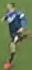
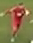
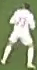
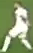
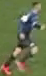
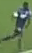
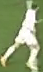
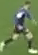
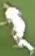
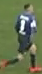
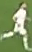
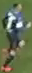
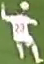
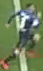
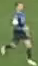
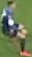
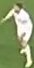
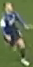
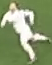
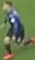
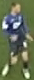
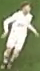
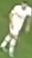
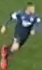
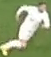
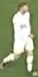
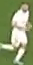
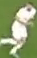
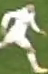
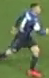
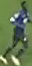
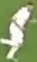
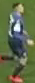
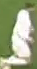
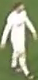
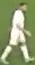
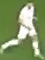
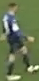
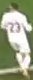
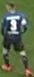
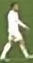
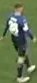
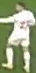
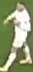
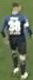
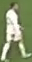
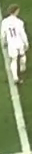
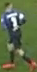
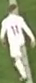
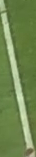
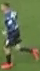
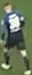
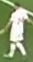
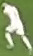
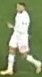
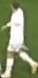
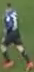
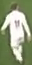
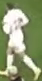
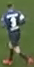
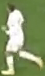
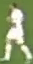
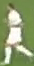

In [15]:
import plotly.graph_objects as go
import numpy as np
from typing import Dict, List
from IPython.core.display import display, HTML
from PIL import Image
import base64
from io import BytesIO


def pil_image_to_data_uri(image: Image.Image) -> str:
    buffered = BytesIO()
    image.save(buffered, format="PNG")
    img_str = base64.b64encode(buffered.getvalue()).decode("utf-8")
    return f"data:image/png;base64,{img_str}"


def display_projections(
    labels: np.ndarray,
    projections: np.ndarray,
    images: List[Image.Image],
    show_legend: bool = False,
    show_markers_with_text: bool = True
) -> None:
    image_data_uris = {f"image_{i}": pil_image_to_data_uri(image) for i, image in enumerate(images)}
    image_ids = np.array([f"image_{i}" for i in range(len(images))])

    unique_labels = np.unique(labels)
    traces = []
    for unique_label in unique_labels:
        mask = labels == unique_label
        customdata_masked = image_ids[mask]
        trace = go.Scatter3d(
            x=projections[mask][:, 0],
            y=projections[mask][:, 1],
            z=projections[mask][:, 2],
            mode='markers+text' if show_markers_with_text else 'markers',
            text=labels[mask],
            customdata=customdata_masked,
            name=str(unique_label),
            marker=dict(size=8),
            hovertemplate="<b>class: %{text}</b><br>image ID: %{customdata}<extra></extra>"
        )
        traces.append(trace)

    all_axes = projections
    min_val = np.min(all_axes)
    max_val = np.max(all_axes)
    padding = (max_val - min_val) * 0.05
    axis_range = [min_val - padding, max_val + padding]

    fig = go.Figure(data=traces)
    fig.update_layout(
        scene=dict(
            xaxis=dict(title='X', range=axis_range),
            yaxis=dict(title='Y', range=axis_range),
            zaxis=dict(title='Z', range=axis_range),
            aspectmode='cube'
        ),
        width=1000,
        height=1000,
        showlegend=show_legend
    )

    plotly_div = fig.to_html(full_html=False, include_plotlyjs=False, div_id="scatter-plot-3d")

    javascript_code = f"""
    <script>
        function displayImage(imageId) {{
            var imageElement = document.getElementById('image-display');
            var placeholderText = document.getElementById('placeholder-text');
            var imageDataURIs = {image_data_uris};
            imageElement.src = imageDataURIs[imageId];
            imageElement.style.display = 'block';
            placeholderText.style.display = 'none';
        }}

        var chartElement = document.getElementById('scatter-plot-3d');

        chartElement.on('plotly_click', function(data) {{
            var customdata = data.points[0].customdata;
            displayImage(customdata);
        }});
    </script>
    """

    html_template = f"""
    <!DOCTYPE html>
    <html>
        <head>
            <script src="https://cdn.plot.ly/plotly-latest.min.js"></script>
            <style>
                #image-container {{
                    position: fixed;
                    top: 0;
                    left: 0;
                    width: 200px;
                    height: 200px;
                    padding: 5px;
                    border: 1px solid #ccc;
                    background-color: white;
                    z-index: 1000;
                    box-sizing: border-box;
                    display: flex;
                    align-items: center;
                    justify-content: center;
                    text-align: center;
                }}
                #image-display {{
                    width: 100%;
                    height: 100%;
                    object-fit: contain;
                }}
            </style>
        </head>
        <body>
            {plotly_div}
            <div id="image-container">
                <img id="image-display" src="" alt="Selected image" style="display: none;" />
                <p id="placeholder-text">Click on a data entry to display an image</p>
            </div>
            {javascript_code}
        </body>
    </html>
    """

    display(HTML(html_template))

display_projections(clusters, projections, crops)

In [16]:
import supervision as sv
from tqdm import tqdm
from sports.common.team import TeamClassifier

SOURCE_VIDEO_PATH = "/content/2e57b9_0.mp4"
PLAYER_ID = 2
STRIDE = 30

frame_generator = sv.get_video_frames_generator(
    source_path=SOURCE_VIDEO_PATH, stride=STRIDE)

crops = []
for frame in tqdm(frame_generator, desc='collecting crops'):
    results = PLAYER_DETECTION_MODEL.predict(frame, conf=0.3, verbose=False)
    result = results[0]

    detections = sv.Detections.from_ultralytics(result)
    players_detections = detections[detections.class_id == PLAYER_ID]
    players_crops = [sv.crop_image(frame, xyxy) for xyxy in players_detections.xyxy]
    crops += players_crops

team_classifier = TeamClassifier(device="cuda")
team_classifier.fit(crops)

collecting crops: 25it [00:09,  2.62it/s]
Embedding extraction: 18it [00:06,  2.72it/s]
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



In [17]:
import numpy as np
import supervision as sv

def resolve_goalkeepers_team_id(
    players: sv.Detections,
    goalkeepers: sv.Detections
) -> np.ndarray:
    goalkeepers_xy = goalkeepers.get_anchors_coordinates(sv.Position.BOTTOM_CENTER)
    players_xy = players.get_anchors_coordinates(sv.Position.BOTTOM_CENTER)
    team_0_centroid = players_xy[players.class_id == 0].mean(axis=0)
    team_1_centroid = players_xy[players.class_id == 1].mean(axis=0)
    goalkeepers_team_id = []
    for goalkeeper_xy in goalkeepers_xy:
        dist_0 = np.linalg.norm(goalkeeper_xy - team_0_centroid)
        dist_1 = np.linalg.norm(goalkeeper_xy - team_1_centroid)
        goalkeepers_team_id.append(0 if dist_0 < dist_1 else 1)

    return np.array(goalkeepers_team_id)

Embedding extraction: 1it [00:00,  3.82it/s]
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



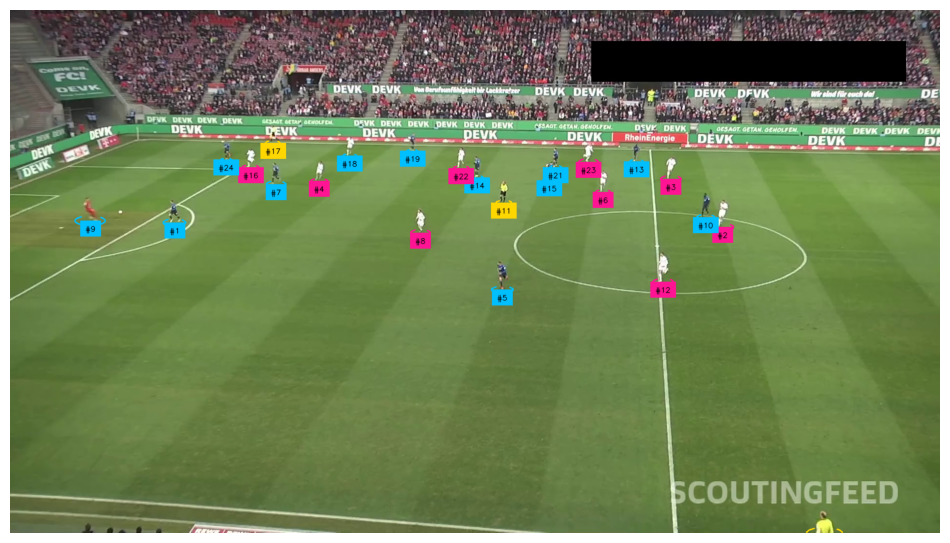

In [18]:
import supervision as sv

SOURCE_VIDEO_PATH = "/content/2e57b9_0.mp4"
BALL_ID = 0
GOALKEEPER_ID = 1
PLAYER_ID = 2
REFEREE_ID = 3

ellipse_annotator = sv.EllipseAnnotator(
    color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    thickness=2
)
label_annotator = sv.LabelAnnotator(
    color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    text_color=sv.Color.from_hex('#000000'),
    text_position=sv.Position.BOTTOM_CENTER
)
triangle_annotator = sv.TriangleAnnotator(
    color=sv.Color.from_hex('#FFD700'),
    base=25,
    height=21,
    outline_thickness=1
)

tracker = sv.ByteTrack()
tracker.reset()

frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
frame = next(frame_generator)

results = PLAYER_DETECTION_MODEL.predict(frame, conf=0.3, verbose=False)
result = results[0]

detections = sv.Detections.from_ultralytics(result)

ball_detections = detections[detections.class_id == BALL_ID]
ball_detections.xyxy = sv.pad_boxes(xyxy=ball_detections.xyxy, px=10)

all_detections = detections[detections.class_id != BALL_ID]
all_detections = all_detections.with_nms(threshold=0.5, class_agnostic=True)
all_detections = tracker.update_with_detections(detections=all_detections)

goalkeepers_detections = all_detections[all_detections.class_id == GOALKEEPER_ID]
players_detections = all_detections[all_detections.class_id == PLAYER_ID]
referees_detections = all_detections[all_detections.class_id == REFEREE_ID]

players_crops = [sv.crop_image(frame, xyxy) for xyxy in players_detections.xyxy]
players_detections.class_id = team_classifier.predict(players_crops)

goalkeepers_detections.class_id = resolve_goalkeepers_team_id(
    players_detections, goalkeepers_detections)

referees_detections.class_id -= 1

all_detections = sv.Detections.merge([
    players_detections, goalkeepers_detections, referees_detections])

labels = [
    f"#{tracker_id}"
    for tracker_id
    in all_detections.tracker_id
]

all_detections.class_id = all_detections.class_id.astype(int)

annotated_frame = frame.copy()
annotated_frame = ellipse_annotator.annotate(
    scene=annotated_frame,
    detections=all_detections)
annotated_frame = label_annotator.annotate(
    scene=annotated_frame,
    detections=all_detections,
    labels=labels)
annotated_frame = triangle_annotator.annotate(
    scene=annotated_frame,
    detections=ball_detections)

sv.plot_image(annotated_frame)

# Pitch Keypoint Detection

In [19]:
from inference import get_model
from google.colab import userdata

FIELD_DETECTION_MODEL = YOLO("/content/drive/MyDrive/pitch.pt")

/usr/local/lib/python3.11/dist-packages/inference/models/utils.py:341: ModelDependencyMissing:

Your `inference` configuration does not support Qwen2.5-VL model. Use pip install 'inference[transformers]' to install missing requirements.

/usr/local/lib/python3.11/dist-packages/inference/models/utils.py:353: ModelDependencyMissing:

Your `inference` configuration does not support SAM model. Use pip install 'inference[sam]' to install missing requirements.

/usr/local/lib/python3.11/dist-packages/inference/models/utils.py:363: ModelDependencyMissing:

Your `inference` configuration does not support SAM model. Use pip install 'inference[sam]' to install missing requirements.

/usr/local/lib/python3.11/dist-packages/inference/models/utils.py:374: ModelDependencyMissing:

Your `inference` configuration does not support SAM model. Use pip install 'inference[clip]' to install missing requirements.

/usr/local/lib/python3.11/dist-packages/inference/models/utils.py:397: ModelDependencyMissing:



0: 384x640 1 pitch, 78.9ms
Speed: 2.7ms preprocess, 78.9ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


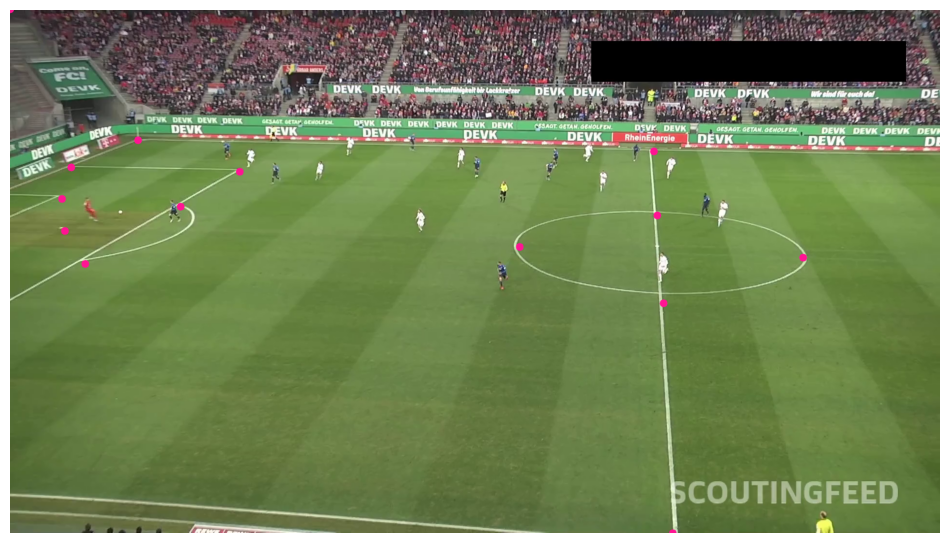

In [20]:
from ultralytics import YOLO
import supervision as sv

SOURCE_VIDEO_PATH = "/content/2e57b9_0.mp4"

vertex_annotator = sv.VertexAnnotator(
    color=sv.Color.from_hex("#FF1493"),
    radius=8
)

frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
frame = next(frame_generator)

results = FIELD_DETECTION_MODEL.predict(frame, conf=0.3)
result = results[0]

key_points = sv.KeyPoints.from_ultralytics(result)

annotated_frame = vertex_annotator.annotate(
    scene=frame.copy(),
    key_points=key_points
)

sv.plot_image(annotated_frame)

# Filter Low Confidence Keypoint


0: 384x640 1 pitch, 65.1ms
Speed: 3.6ms preprocess, 65.1ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


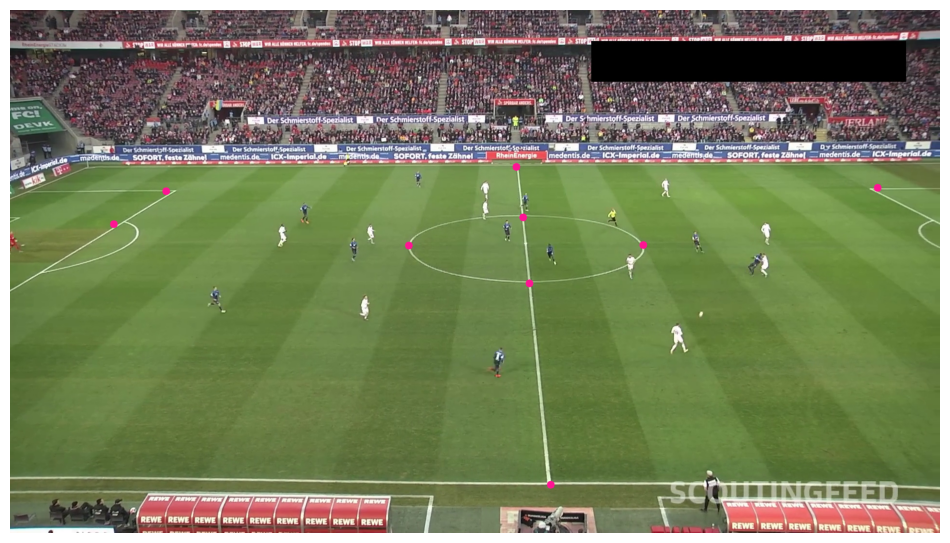

In [21]:
import supervision as sv

SOURCE_VIDEO_PATH = "/content/2e57b9_0.mp4"

vertex_annotator = sv.VertexAnnotator(
    color=sv.Color.from_hex('#FF1493'),
    radius=8)

frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH, start=200)
frame = next(frame_generator)

results = FIELD_DETECTION_MODEL.predict(frame, conf=0.3)
result = results[0]

key_points = sv.KeyPoints.from_ultralytics(result)

filter = key_points.confidence[0] > 0.5
frame_reference_points = key_points.xy[0][filter]
frame_reference_key_points = sv.KeyPoints(
    xy=frame_reference_points[np.newaxis, ...])

annotated_frame = frame.copy()
annotated_frame = vertex_annotator.annotate(
    scene=annotated_frame,
    key_points=frame_reference_key_points)

sv.plot_image(annotated_frame)

# Project Pitch Lines On Frame

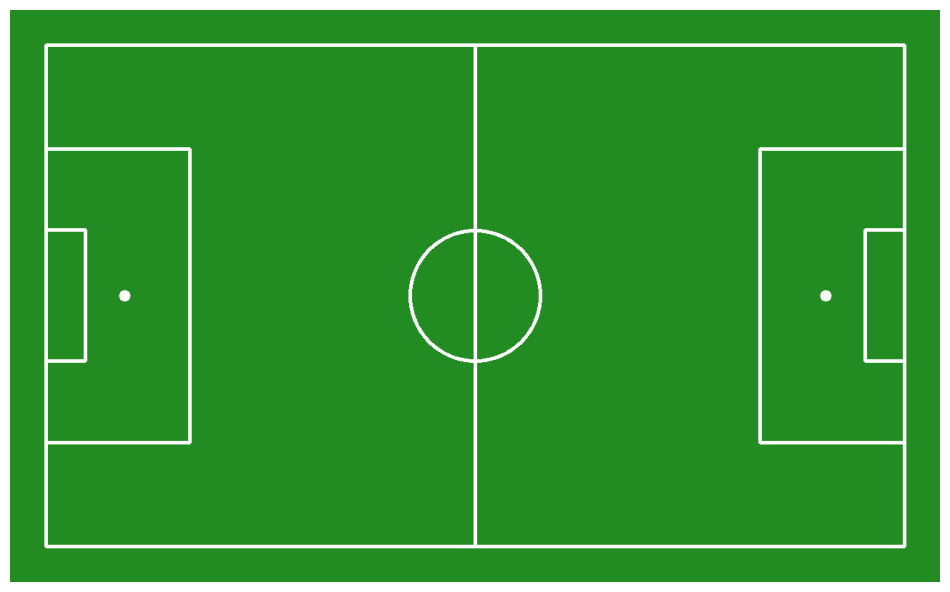

In [22]:
from sports.annotators.soccer import draw_pitch
from sports.configs.soccer import SoccerPitchConfiguration

CONFIG = SoccerPitchConfiguration()

annotated_frame = draw_pitch(CONFIG)

sv.plot_image(annotated_frame)


0: 384x640 1 pitch, 65.1ms
Speed: 4.5ms preprocess, 65.1ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


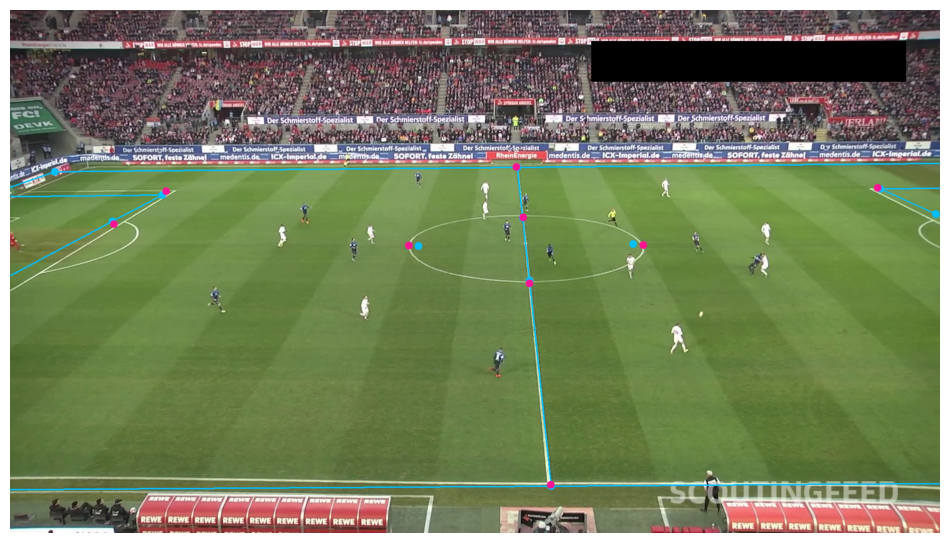

In [23]:
import numpy as np
import supervision as sv
from sports.common.view import ViewTransformer

SOURCE_VIDEO_PATH = "/content/2e57b9_0.mp4"

edge_annotator = sv.EdgeAnnotator(
    color=sv.Color.from_hex('#00BFFF'),
    thickness=2, edges=CONFIG.edges)
vertex_annotator = sv.VertexAnnotator(
    color=sv.Color.from_hex('#FF1493'),
    radius=8)
vertex_annotator_2 = sv.VertexAnnotator(
    color=sv.Color.from_hex('#00BFFF'),
    radius=8)

frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH, start=200)
frame = next(frame_generator)

results = FIELD_DETECTION_MODEL.predict(frame, conf=0.3)
result = results[0]

key_points = sv.KeyPoints.from_ultralytics(result)

filter = key_points.confidence[0] > 0.5
frame_reference_points = key_points.xy[0][filter]
frame_reference_key_points = sv.KeyPoints(
    xy=frame_reference_points[np.newaxis, ...])

pitch_reference_points = np.array(CONFIG.vertices)[filter]

transformer = ViewTransformer(
    source=pitch_reference_points,
    target=frame_reference_points
)

pitch_all_points = np.array(CONFIG.vertices)
frame_all_points = transformer.transform_points(points=pitch_all_points)

frame_all_key_points = sv.KeyPoints(xy=frame_all_points[np.newaxis, ...])

annotated_frame = frame.copy()
annotated_frame = edge_annotator.annotate(
    scene=annotated_frame,
    key_points=frame_all_key_points)
annotated_frame = vertex_annotator_2.annotate(
    scene=annotated_frame,
    key_points=frame_all_key_points)
annotated_frame = vertex_annotator.annotate(
    scene=annotated_frame,
    key_points=frame_reference_key_points)

sv.plot_image(annotated_frame)

# Project Players, Referees, and Ball On Pitch

In [24]:
import supervision as sv
from tqdm import tqdm
from sports.common.team import TeamClassifier

SOURCE_VIDEO_PATH = "/content/2e57b9_0.mp4"
PLAYER_ID = 2
STRIDE = 30

frame_generator = sv.get_video_frames_generator(
    source_path=SOURCE_VIDEO_PATH, stride=STRIDE)

crops = []
for frame in tqdm(frame_generator, desc='collecting crops'):
    result = PLAYER_DETECTION_MODEL.predict(frame, conf=0.3)[0]
    detections = sv.Detections.from_ultralytics(result)
    players_detections = detections[detections.class_id == PLAYER_ID]
    players_crops = [sv.crop_image(frame, xyxy) for xyxy in players_detections.xyxy]
    crops.extend(players_crops)

team_classifier = TeamClassifier(device="cuda")
team_classifier.fit(crops)

collecting crops: 25it [00:10,  2.47it/s]
Embedding extraction: 18it [00:06,  2.66it/s]
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



Embedding extraction: 1it [00:00,  3.98it/s]
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



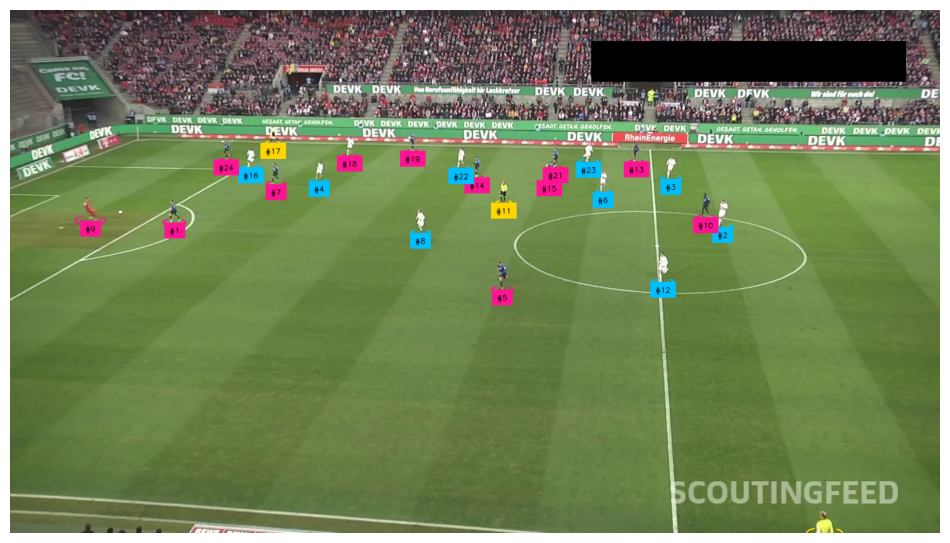


0: 384x640 1 pitch, 29.6ms
Speed: 4.2ms preprocess, 29.6ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


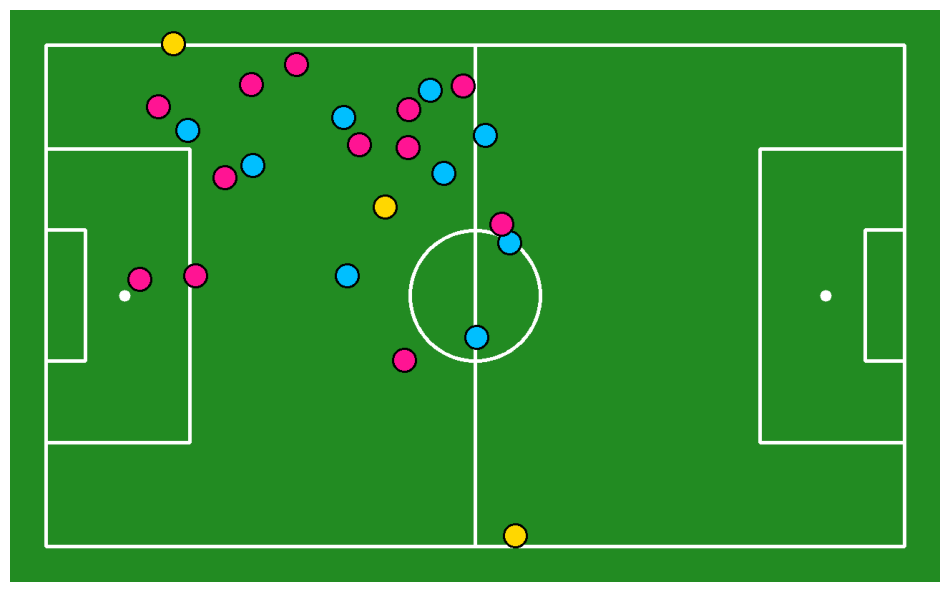

In [25]:
import supervision as sv
from sports.annotators.soccer import (
    draw_pitch,
    draw_points_on_pitch,
    draw_pitch_voronoi_diagram
)

SOURCE_VIDEO_PATH = "/content/2e57b9_0.mp4"
BALL_ID = 0
GOALKEEPER_ID = 1
PLAYER_ID = 2
REFEREE_ID = 3

ellipse_annotator = sv.EllipseAnnotator(
    color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    thickness=2
)
label_annotator = sv.LabelAnnotator(
    color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    text_color=sv.Color.from_hex('#000000'),
    text_position=sv.Position.BOTTOM_CENTER
)
triangle_annotator = sv.TriangleAnnotator(
    color=sv.Color.from_hex('#FFD700'),
    base=20, height=17
)

tracker = sv.ByteTrack()
tracker.reset()

frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
frame = next(frame_generator)

# ball, goalkeeper, player, referee detection

result = PLAYER_DETECTION_MODEL.predict(frame, conf=0.3)[0]
detections = sv.Detections.from_ultralytics(result)

ball_detections = detections[detections.class_id == BALL_ID]
ball_detections.xyxy = sv.pad_boxes(xyxy=ball_detections.xyxy, px=10)

all_detections = detections[detections.class_id != BALL_ID]
all_detections = all_detections.with_nms(threshold=0.5, class_agnostic=True)
all_detections = tracker.update_with_detections(detections=all_detections)

goalkeepers_detections = all_detections[all_detections.class_id == GOALKEEPER_ID]
players_detections = all_detections[all_detections.class_id == PLAYER_ID]
referees_detections = all_detections[all_detections.class_id == REFEREE_ID]

# team assignment

players_crops = [sv.crop_image(frame, xyxy) for xyxy in players_detections.xyxy]
players_detections.class_id = team_classifier.predict(players_crops)

goalkeepers_detections.class_id = resolve_goalkeepers_team_id(
    players_detections, goalkeepers_detections)

referees_detections.class_id -= 1

all_detections = sv.Detections.merge([
    players_detections, goalkeepers_detections, referees_detections])

# frame visualization

labels = [
    f"#{tracker_id}"
    for tracker_id
    in all_detections.tracker_id
]

all_detections.class_id = all_detections.class_id.astype(int)

annotated_frame = frame.copy()
annotated_frame = ellipse_annotator.annotate(
    scene=annotated_frame,
    detections=all_detections)
annotated_frame = label_annotator.annotate(
    scene=annotated_frame,
    detections=all_detections,
    labels=labels)
annotated_frame = triangle_annotator.annotate(
    scene=annotated_frame,
    detections=ball_detections)

sv.plot_image(annotated_frame)

players_detections = sv.Detections.merge([
    players_detections, goalkeepers_detections
])

# detect pitch key points

results = FIELD_DETECTION_MODEL.predict(frame, conf=0.3)
result = results[0]

key_points = sv.KeyPoints.from_ultralytics(result)

# project ball, players and referees on pitch

filter = key_points.confidence[0] > 0.5
frame_reference_points = key_points.xy[0][filter]
pitch_reference_points = np.array(CONFIG.vertices)[filter]

transformer = ViewTransformer(
    source=frame_reference_points,
    target=pitch_reference_points
)

frame_ball_xy = ball_detections.get_anchors_coordinates(sv.Position.BOTTOM_CENTER)
pitch_ball_xy = transformer.transform_points(points=frame_ball_xy)

players_xy = players_detections.get_anchors_coordinates(sv.Position.BOTTOM_CENTER)
pitch_players_xy = transformer.transform_points(points=players_xy)

referees_xy = referees_detections.get_anchors_coordinates(sv.Position.BOTTOM_CENTER)
pitch_referees_xy = transformer.transform_points(points=referees_xy)

# visualize video game-style radar view

annotated_frame = draw_pitch(CONFIG)
annotated_frame = draw_points_on_pitch(
    config=CONFIG,
    xy=pitch_ball_xy,
    face_color=sv.Color.WHITE,
    edge_color=sv.Color.BLACK,
    radius=10,
    pitch=annotated_frame)
annotated_frame = draw_points_on_pitch(
    config=CONFIG,
    xy=pitch_players_xy[players_detections.class_id == 0],
    face_color=sv.Color.from_hex('00BFFF'),
    edge_color=sv.Color.BLACK,
    radius=16,
    pitch=annotated_frame)
annotated_frame = draw_points_on_pitch(
    config=CONFIG,
    xy=pitch_players_xy[players_detections.class_id == 1],
    face_color=sv.Color.from_hex('FF1493'),
    edge_color=sv.Color.BLACK,
    radius=16,
    pitch=annotated_frame)
annotated_frame = draw_points_on_pitch(
    config=CONFIG,
    xy=pitch_referees_xy,
    face_color=sv.Color.from_hex('FFD700'),
    edge_color=sv.Color.BLACK,
    radius=16,
    pitch=annotated_frame)

sv.plot_image(annotated_frame)

# UI Demo

In [31]:
pip install gradio supervision ultralytics opencv-python tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.3/95.3 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 8.5 MB/s eta 0:00:00
  Attempting uninstall: starlette
    Found existing installation: starlette 0.37.2
    Uninstalling starlette-0.37.2:
      Successfully uninstalled starlette-0.37.2
  Attempting uninstall: fastapi
    Found existing installation: fastapi 0.110.3
    Uninstalling fastapi-0.110.3:
      Successfully uninstalled fastapi-0.110.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inference-gpu 0.51.0 requires fastapi<0.111,>=0.100, but you have fastapi 0.115.13 which is incompatible.


In [27]:
import gradio as gr
import cv2
import numpy as np
import supervision as sv
import tempfile
import os
from pathlib import Path

# Constants
BALL_ID = 0
GOALKEEPER_ID = 1
PLAYER_ID = 2
REFEREE_ID = 3

def process_soccer_video(input_video, progress=gr.Progress()):
    if input_video is None:
        return None, "Please upload a video file"

    try:
        output_dir = tempfile.mkdtemp()
        output_path = os.path.join(output_dir, "output_with_radar.mp4")

        cap = cv2.VideoCapture(input_video)

        if not cap.isOpened():
            return None, "Error: Could not open video file"

        fps = cap.get(cv2.CAP_PROP_FPS)
        width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
        height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
        total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

        progress(0, desc="Initializing video processing...")

        fourcc = cv2.VideoWriter_fourcc(*'mp4v')
        out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

        tracker = sv.ByteTrack()

        progress(0.1, desc="Training team classifier...")
        team_classifier = TeamClassifier(device="cuda")

        crops = []
        sample_frames = min(20, total_frames)
        for i in range(0, total_frames, max(1, total_frames // sample_frames)):
            cap.set(cv2.CAP_PROP_POS_FRAMES, i)
            ret, frame = cap.read()
            if not ret:
                continue
            result = PLAYER_DETECTION_MODEL.predict(frame, conf=0.3)[0]
            detections = sv.Detections.from_ultralytics(result)
            players = detections[detections.class_id == PLAYER_ID]
            crops.extend([sv.crop_image(frame, xyxy) for xyxy in players.xyxy])

        if crops:
            team_classifier.fit(crops)

        progress(0.2, desc="Setting up annotators...")

        ellipse_annotator = sv.EllipseAnnotator(
            color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
            thickness=2
        )
        label_annotator = sv.LabelAnnotator(
            color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
            text_color=sv.Color.from_hex('#000000'),
            text_position=sv.Position.BOTTOM_CENTER,
            text_scale=0.5
        )
        triangle_annotator = sv.TriangleAnnotator(
            color=sv.Color.from_hex('#FFD700'),
            base=20, height=17
        )

        cap.set(cv2.CAP_PROP_POS_FRAMES, 0)
        tracker.reset()

        progress(0.3, desc="Processing frames...")

        for frame_idx in range(total_frames):
            ret, frame = cap.read()
            if not ret:
                break

            if frame_idx % 10 == 0:
                progress_val = 0.3 + (frame_idx / total_frames) * 0.6
                progress(progress_val, desc=f"Processing frame {frame_idx + 1}/{total_frames}")

            result = PLAYER_DETECTION_MODEL.predict(frame, conf=0.3)[0]
            detections = sv.Detections.from_ultralytics(result)

            ball_detections = detections[detections.class_id == BALL_ID]
            if len(ball_detections) > 0:
                ball_detections.xyxy = sv.pad_boxes(xyxy=ball_detections.xyxy, px=10)

            all_detections = detections[detections.class_id != BALL_ID]
            all_detections = all_detections.with_nms(threshold=0.5, class_agnostic=True)
            all_detections = tracker.update_with_detections(detections=all_detections)

            goalkeepers = all_detections[all_detections.class_id == GOALKEEPER_ID]
            players = all_detections[all_detections.class_id == PLAYER_ID]
            referees = all_detections[all_detections.class_id == REFEREE_ID]

            if len(players) > 0:
                crops = [sv.crop_image(frame, xyxy) for xyxy in players.xyxy]
                players.class_id = team_classifier.predict(crops)
            if len(goalkeepers) > 0:
                goalkeepers.class_id = resolve_goalkeepers_team_id(players, goalkeepers)
            if len(referees) > 0:
                referees.class_id -= 1

            all_detections = sv.Detections.merge([players, goalkeepers, referees])

            labels = [f"{tracker_id}" for tracker_id in all_detections.tracker_id]
            all_detections.class_id = all_detections.class_id.astype(int)

            annotated_frame = frame.copy()
            annotated_frame = ellipse_annotator.annotate(
                scene=annotated_frame,
                detections=all_detections
            )
            annotated_frame = label_annotator.annotate(
                scene=annotated_frame,
                detections=all_detections,
                labels=labels
            )
            annotated_frame = triangle_annotator.annotate(
                scene=annotated_frame,
                detections=ball_detections
            )

            radar_frame = draw_pitch(
                config=CONFIG,
                background_color=sv.Color.from_hex("#006400"),
                line_color=sv.Color.from_hex("#FFFFFF")
            )

            try:
                keypoint_result = FIELD_DETECTION_MODEL.predict(frame, conf=0.3)[0]
                keypoints = sv.KeyPoints.from_ultralytics(keypoint_result)
                mask = keypoints.confidence[0] > 0.5
                frame_points = keypoints.xy[0][mask]
                pitch_points = np.array(CONFIG.vertices)[mask]
                if len(frame_points) >= 4:
                    transformer = ViewTransformer(source=frame_points, target=pitch_points)

                    players_xy = players.get_anchors_coordinates(sv.Position.BOTTOM_CENTER)
                    pitch_players_xy = transformer.transform_points(players_xy)

                    referees_xy = referees.get_anchors_coordinates(sv.Position.BOTTOM_CENTER)
                    pitch_referees_xy = transformer.transform_points(referees_xy)

                    pitch_ball_xy = (transformer.transform_points(
                        ball_detections.get_anchors_coordinates(sv.Position.BOTTOM_CENTER))
                        if len(ball_detections) > 0 else np.empty((0, 2)))

                    radar_frame = draw_points_on_pitch(
                        config=CONFIG,
                        xy=pitch_ball_xy,
                        face_color=sv.Color.WHITE,
                        edge_color=sv.Color.BLACK,
                        radius=10,
                        pitch=radar_frame
                    )
                    radar_frame = draw_points_on_pitch(
                        config=CONFIG,
                        xy=pitch_players_xy[players.class_id == 0],
                        face_color=sv.Color.from_hex('00BFFF'),
                        edge_color=sv.Color.BLACK,
                        radius=16,
                        pitch=radar_frame
                    )
                    radar_frame = draw_points_on_pitch(
                        config=CONFIG,
                        xy=pitch_players_xy[players.class_id == 1],
                        face_color=sv.Color.from_hex('FF1493'),
                        edge_color=sv.Color.BLACK,
                        radius=16,
                        pitch=radar_frame
                    )
                    radar_frame = draw_points_on_pitch(
                        config=CONFIG,
                        xy=pitch_referees_xy,
                        face_color=sv.Color.from_hex('FFD700'),
                        edge_color=sv.Color.BLACK,
                        radius=16,
                        pitch=radar_frame
                    )

            except Exception as e:
                print(f"Radar error in frame {frame_idx}: {e}")

            radar_resized = cv2.resize(radar_frame, (350, 250))
            x_offset = (width - radar_resized.shape[1]) // 2
            y_offset = height - radar_resized.shape[0] - 20

            overlay = annotated_frame.copy()
            overlay[y_offset:y_offset + radar_resized.shape[0], x_offset:x_offset + radar_resized.shape[1]] = radar_resized

            alpha = 0.6
            annotated_frame[y_offset:y_offset + radar_resized.shape[0], x_offset:x_offset + radar_resized.shape[1]] = cv2.addWeighted(
                overlay[y_offset:y_offset + radar_resized.shape[0], x_offset:x_offset + radar_resized.shape[1]],
                alpha,
                annotated_frame[y_offset:y_offset + radar_resized.shape[0], x_offset:x_offset + radar_resized.shape[1]],
                1 - alpha,
                0
            )

            out.write(annotated_frame)

        progress(0.95, desc="Finalizing output...")
        cap.release()
        out.release()

        progress(1.0, desc="Processing complete!")

        return output_path, f"✅ Processing complete! Total frames: {total_frames}"

    except Exception as e:
        return None, f"❌ Error processing video: {str(e)}"

def create_interface():
    with gr.Blocks(title="Football Radar Minimap", theme=gr.themes.Soft()) as demo:

        gr.Markdown("""
        # ⚽ Football Radar Minimap

        Upload a football match footage to get player tracking, team classification, and tactical radar overlay.
        """)

        with gr.Row():
            with gr.Column(scale=1):
                input_video = gr.Video(
                    label="Upload Football Footage",
                    format="mp4"
                )

                process_btn = gr.Button(
                    "🚀 Process Video",
                    variant="primary",
                    size="lg"
                )

                status_text = gr.Textbox(
                    label="Status",
                    value="Ready to process video...",
                    interactive=False,
                    lines=2
                )

            with gr.Column(scale=1):
                output_video = gr.Video(
                    label="Processed Video Output",
                    format="mp4"
                )

                download_btn = gr.DownloadButton(
                    label="📥 Download Processed Video",
                    visible=False
                )

        def update_download_button(video_path, status):
            if video_path and "complete" in status.lower():
                return gr.DownloadButton(
                    label="📥 Download Processed Video",
                    value=video_path,
                    visible=True
                )
            else:
                return gr.DownloadButton(visible=False)

        process_btn.click(
            fn=process_soccer_video,
            inputs=[input_video],
            outputs=[output_video, status_text],
            show_progress=True
        ).then(
            fn=update_download_button,
            inputs=[output_video, status_text],
            outputs=[download_btn]
        )

    return demo

if __name__ == "__main__":
    demo = create_interface()
    demo.launch(
        share=True,
        server_name="0.0.0.0",
        server_port=7860,
        show_error=True
    )

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://fd2a78e2a6e7934b63.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
